## MELAKUKAN INSTALL PLOTLY

In [1]:
pip install plotly


     ---------------------------------------- 15.3/15.3 MB 1.5 MB/s eta 0:00:00


## MENGINSTALL PAKET XLRD YANG TERDAPAT PADA CONDA

In [2]:
!conda install -c anaconda xlrd --yes

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
pip install xlrd

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## MELAKUKAN IMPORT LIBRARY YANG DIPERLUKAN

In [8]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge,Lasso
from sklearn import model_selection
from sklearn.linear_model import RidgeCV,LassoCV

#to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## MELAKUKAN IMPORT DATASET

In [9]:
df_c = pd.read_csv(r'C:\\Users\Erika Winckler\Downloads\archive (4)\heart_failure_clinical_records_dataset.csv')

                  
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


## MELIHAT 5 BARIS PERTAMA DARI DATAFRAME

In [10]:
df_c.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## MELIHAT DIMENSI ATAU UKURAN DARI DATAFRAME 'df_c'

In [11]:
df_c.shape

(299, 13)

## MELIHAT 5 BARIS TERAKIR DARI DATAFRAME

In [12]:
df_c.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## Memberikan informasi tentang struktur dan tipe data dalam dataframe

In [18]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Menghitung jumlah kemunculan setiap nilai unik dalam suatu kolom

In [17]:
df_c.value_counts()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
40.0  0        90                        0         35                 0                    255000.0   1.1               136           1    1        212   0              1
65.0  1        160                       1         20                 0                    327000.0   2.7               116           0    0        8     1              1
               128                       1         30                 1                    297000.0   1.6               136           0    0        20    1              1
               113                       1         60                 1                    203000.0   0.9               140           0    0        94    0              1
               68                        1         60                 1                    304000.0   0.8               140           1    0        79

## Mengidentifikasi nilai-nilai yang kosong atau hilang (NaN) dalam setiap sel

In [16]:
df_c.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Memberikan ringkasan statistik tentang kolom-kolom numerik dalam dataframe

In [15]:
df_c.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Membuat histogram dari setiap kolom numerik dalam dataframe untuk melihat distribusi frekuensi

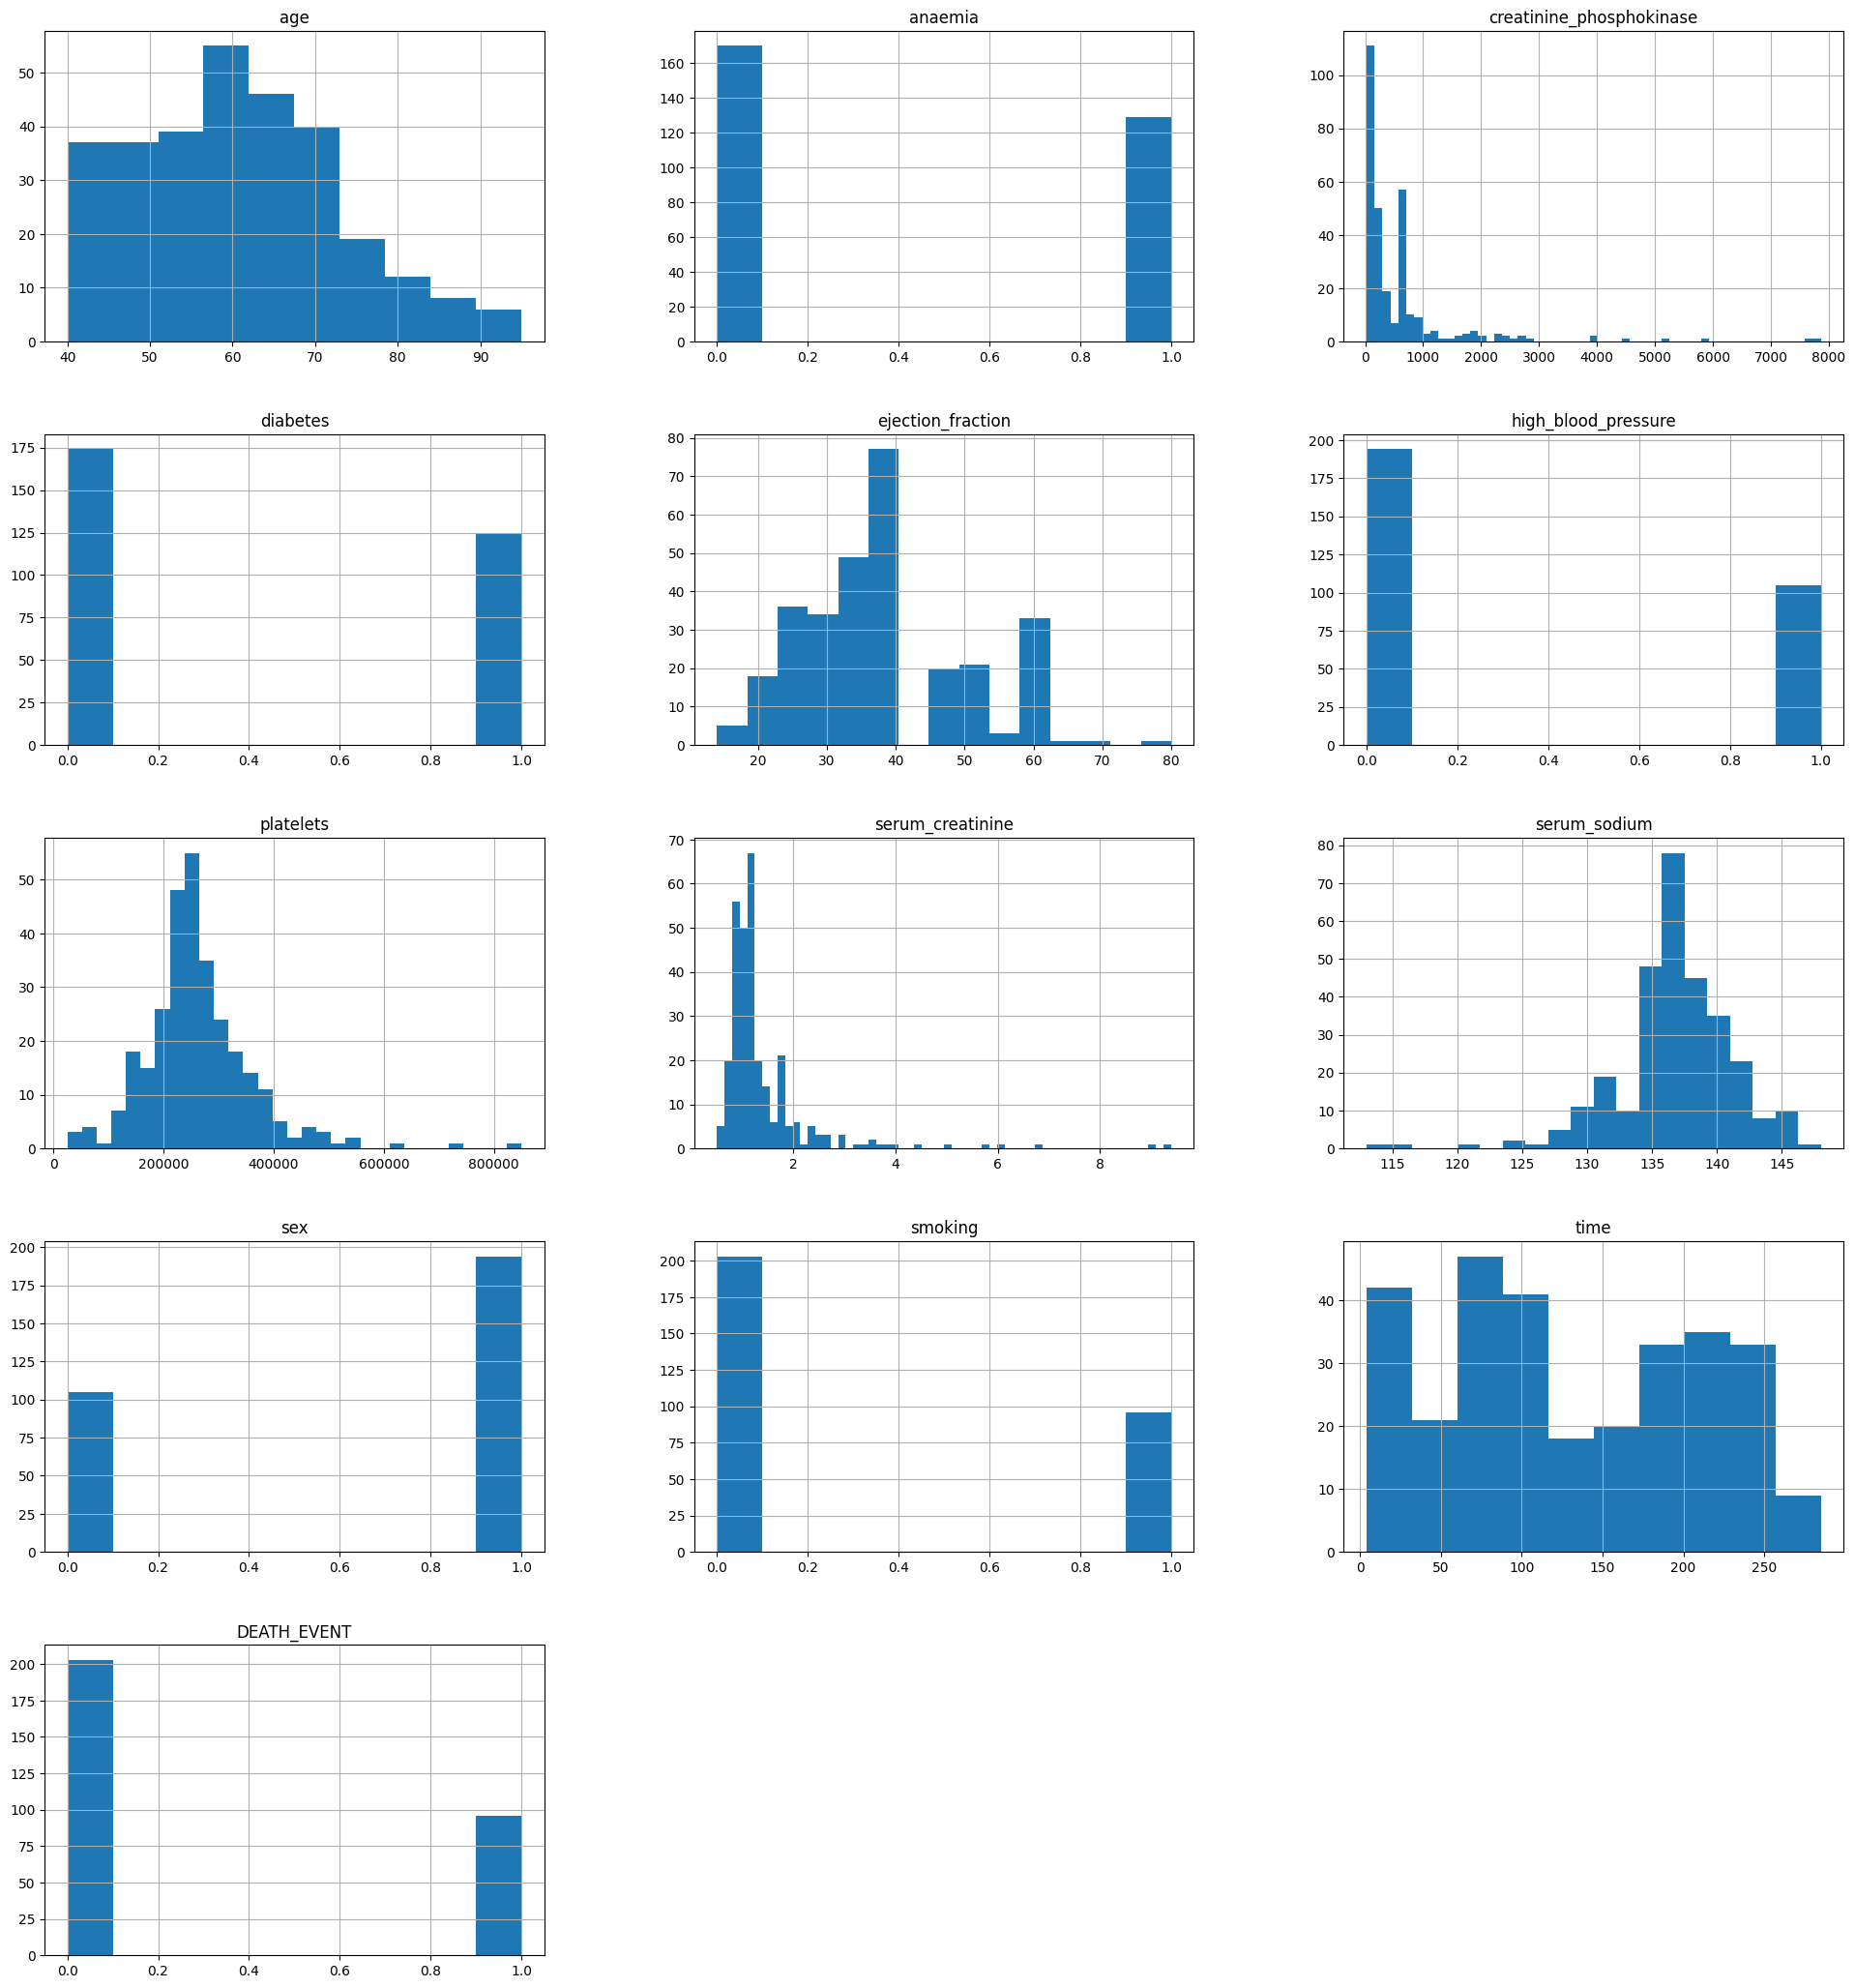

In [19]:
# Melihat distribusi frekuensi
df_c.hist(bins='auto',layout=(15,3), figsize=(24,80));

## Membuat scatter plot dan histogram untuk setiap pasangan kolom numerik dalam dataframe df_c

In [20]:
sns.pairplot(df_c)

Error in callback <function flush_figures at 0x0000018CEBE4D630> (for post_execute):


KeyboardInterrupt: 

## Membuat pair plot dengan garis regresi pada scatter plot dan mengatur judul pada figure

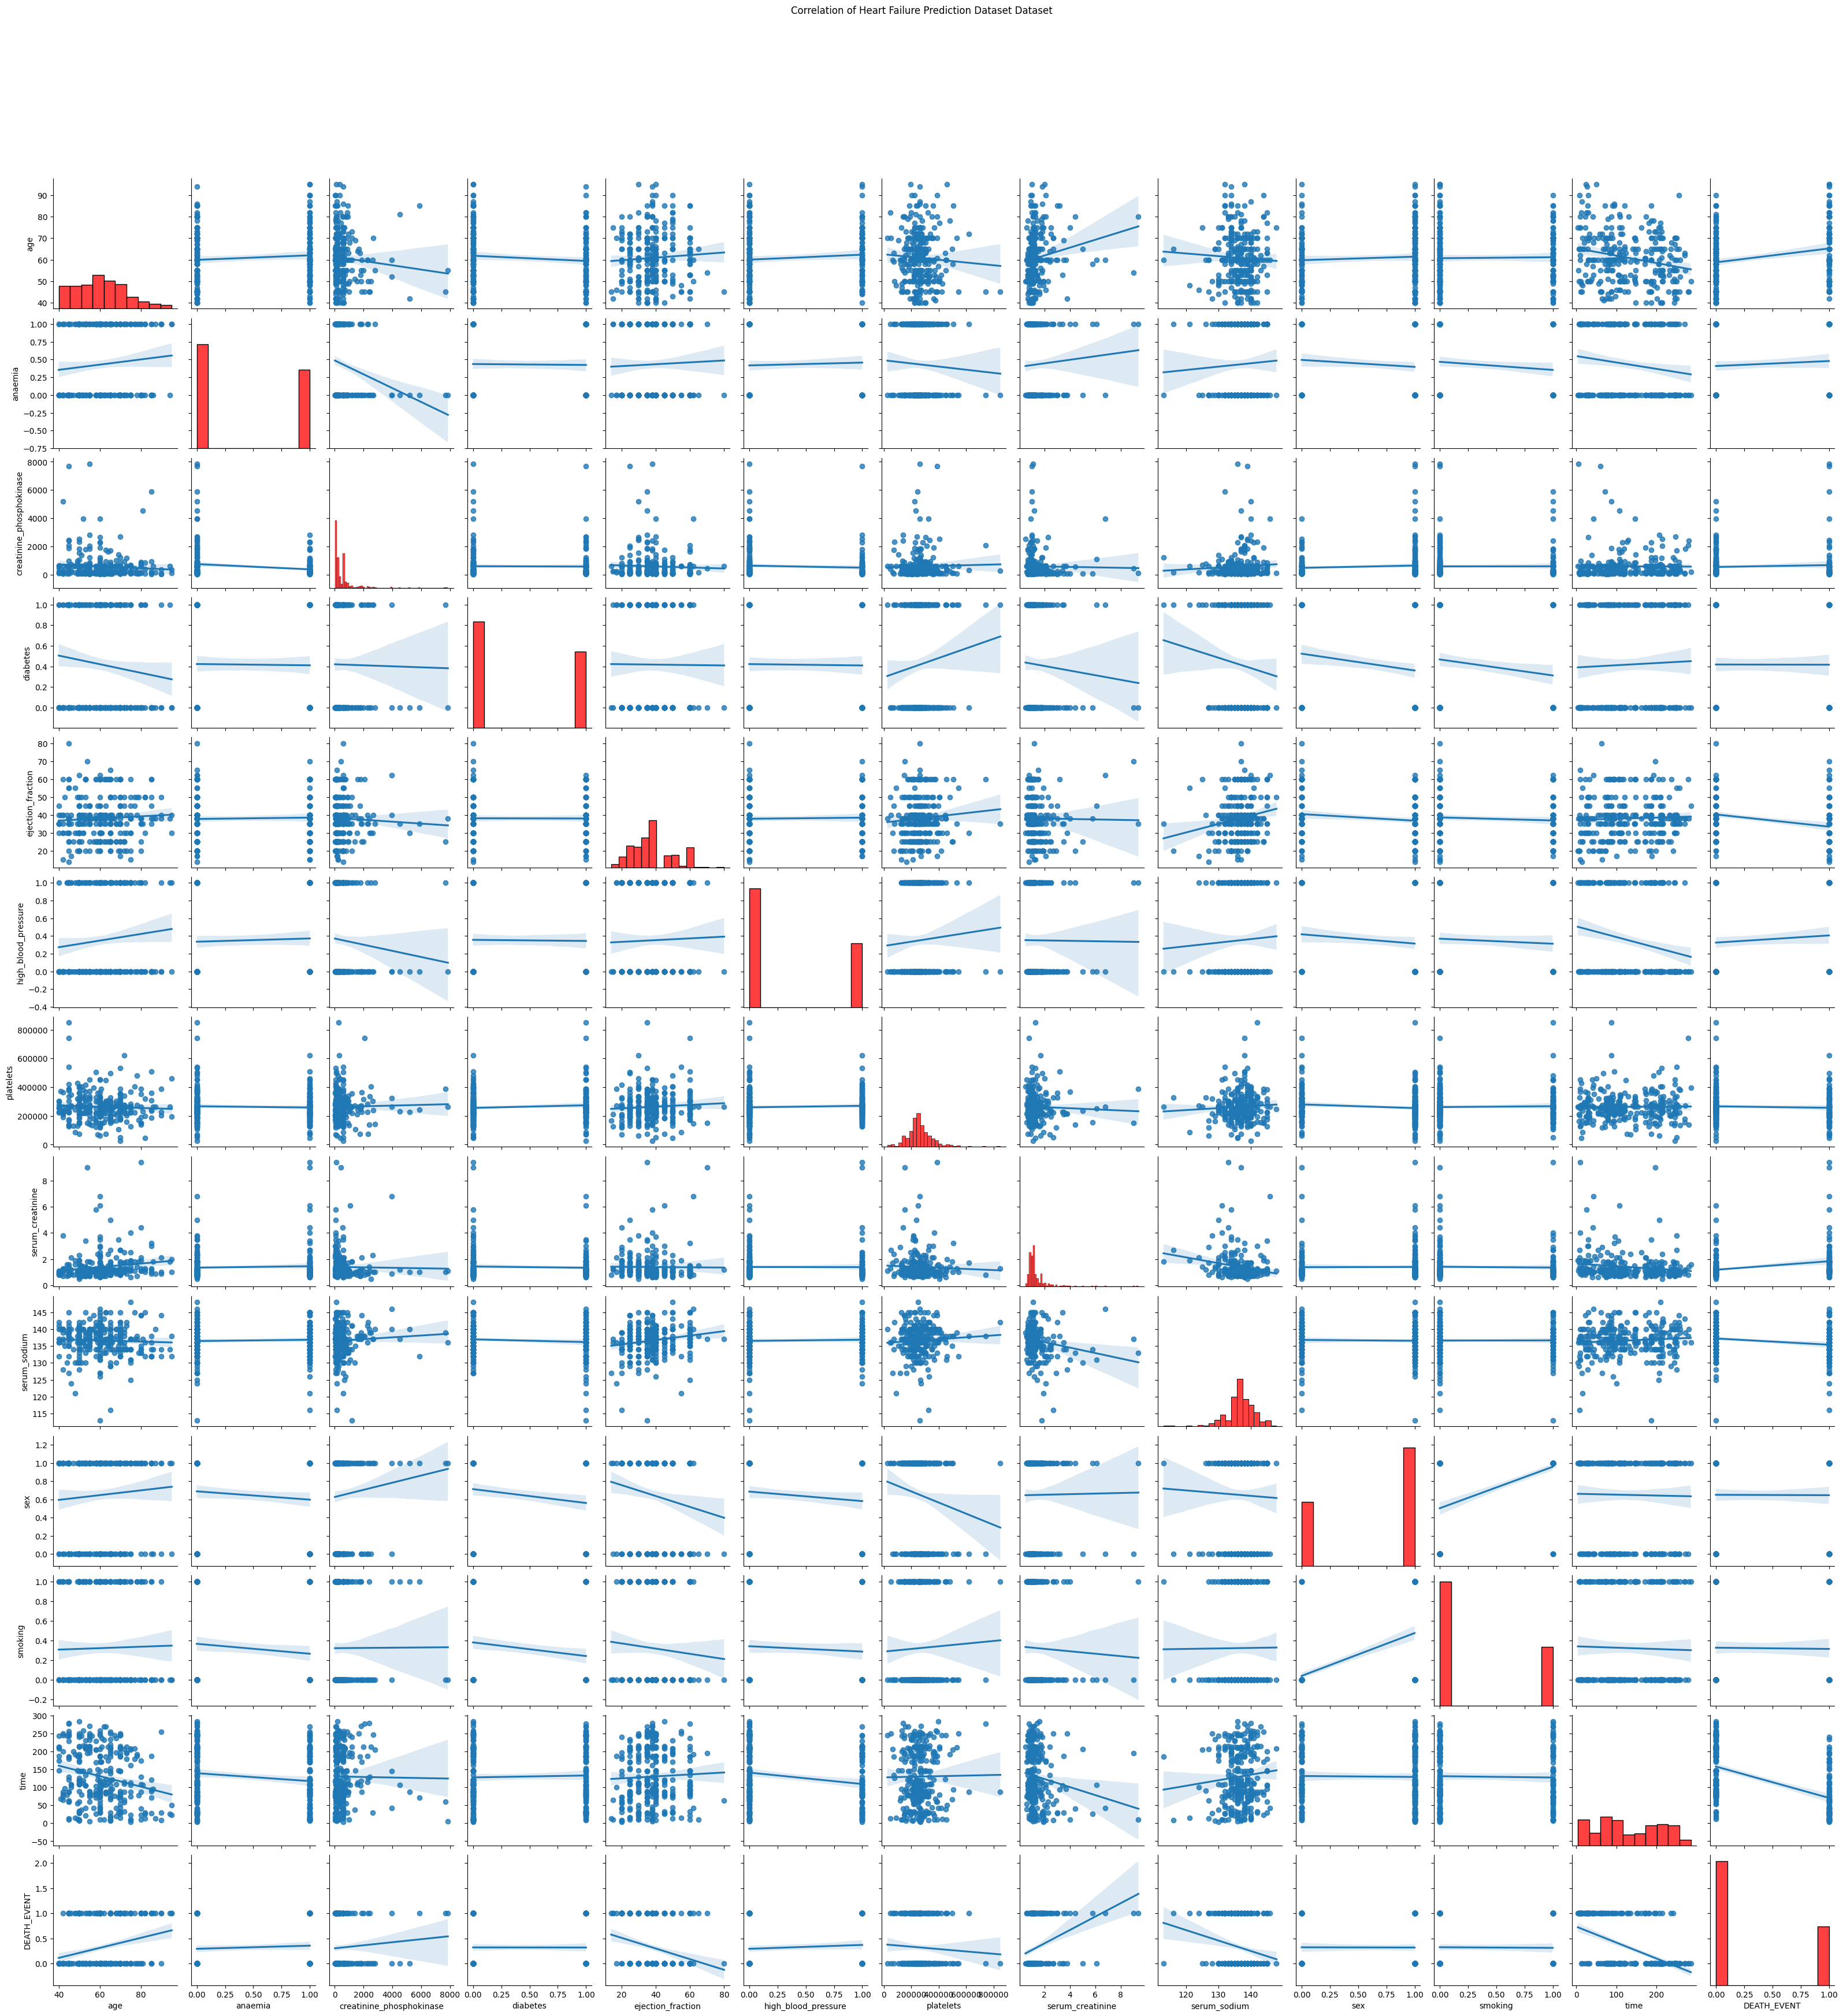

In [ ]:
g= sns.pairplot(df_c,kind="reg",diag_kws= {'color': 'red'})

g.fig.suptitle("Correlation of Heart Failure Prediction Dataset Dataset", y=1.08)

plt.show()

## Membuat diagram pie (pie chart) dari dataframe df_c

In [ ]:
fig = px.pie(df_c, names='DEATH_EVENT', title='Distribution of Death Events in Patients',width=600, height=400)
fig.show()

## Membuat heatmap (peta panas) dari matriks korelasi antara kolom-kolom numerik dalam dataframe df_c

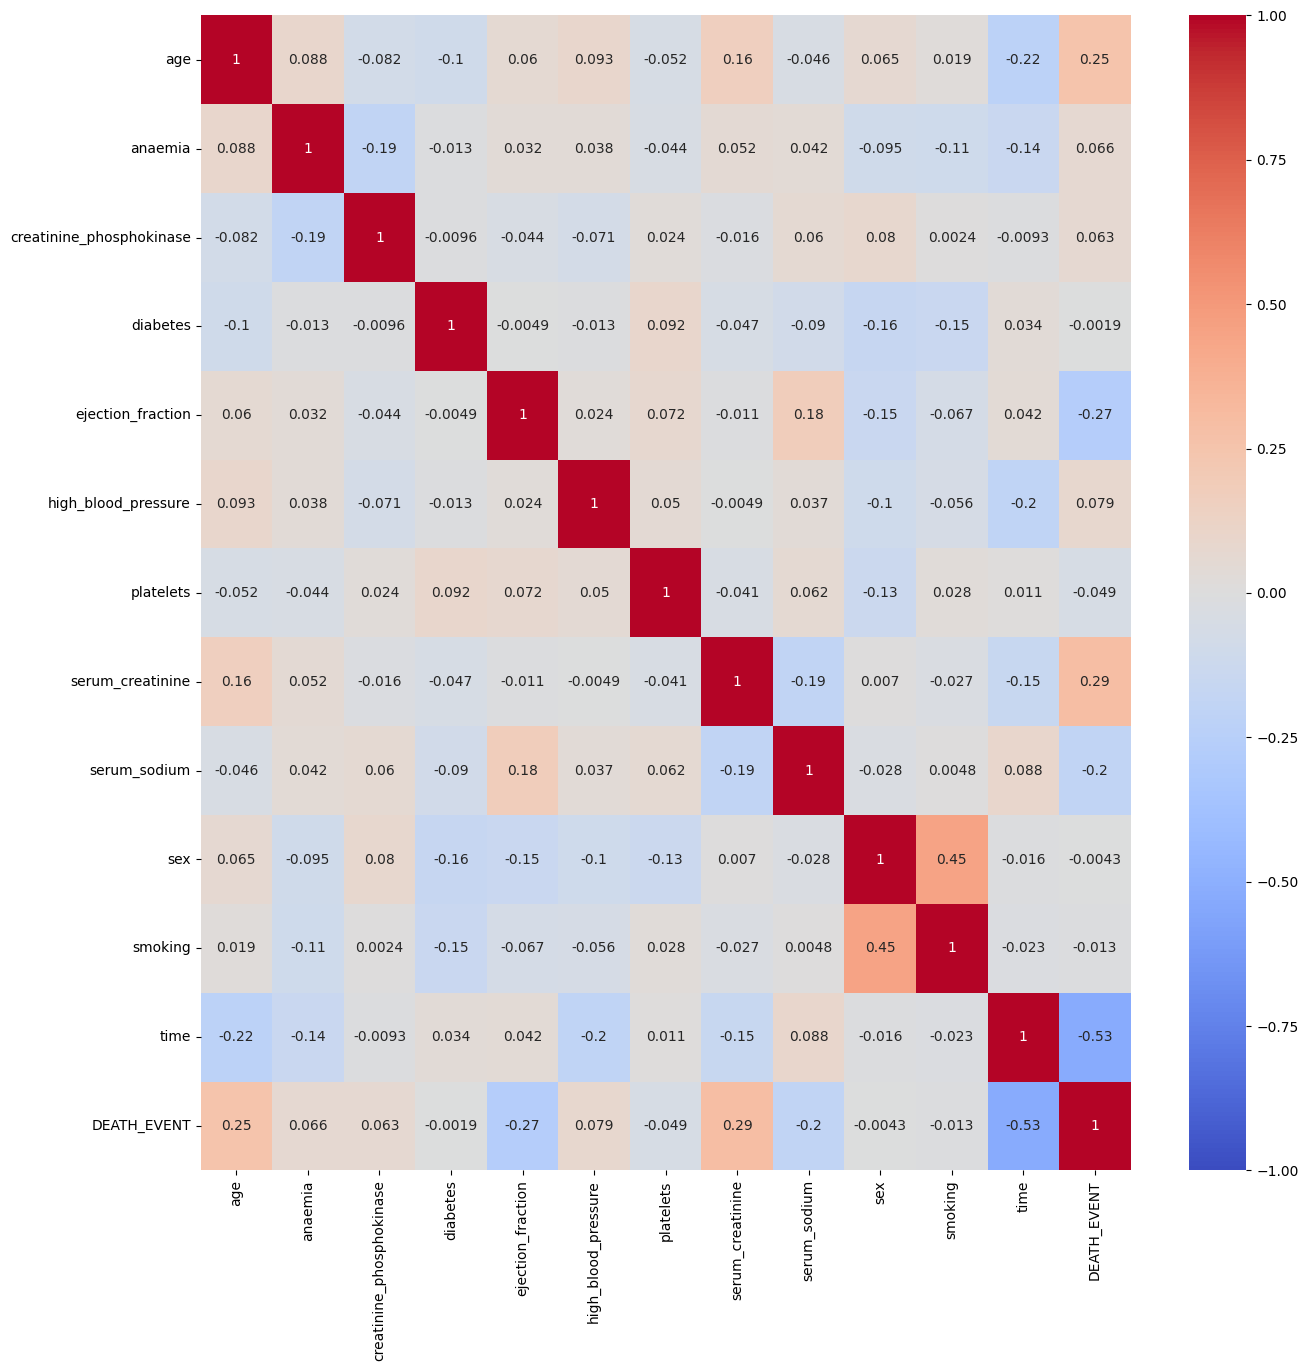

In [14]:
corr = df_c.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

## Mengambil nilai korelasi antara kolom 'DEATH_EVENT' dengan kolom-kolom lain dalam dataframe df_c yang memiliki korelasi absolut lebih dari 0.1

In [21]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [22]:
# Trial and Error revealed that not considering Age column improves accuracy

x = df_c[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
x = (x-x.mean())/x.std()
y = df_c['DEATH_EVENT']

#Spliting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

## MELIHAT DIMENSI ATAU UKURAN DARI x_train dan y_train

In [23]:
print(x_train.shape, y_train.shape)

(239, 4) (239,)


## menghitung jumlah kemunculan setiap nilai unik x_train dan y_train

In [24]:
print(x_train.value_counts(), y_train.value_counts())

ejection_fraction  serum_creatinine  serum_sodium  time     
-2.034976          -0.574068         -2.181409     -1.497933    1
 0.161928          -0.380740          0.311522      1.323716    1
                   -0.670733          0.764782      0.215671    1
                                                    1.478326    1
                   -0.574068          0.991412      0.731041    1
                                                               ..
-0.260554          -0.477404          0.764782     -1.420627    1
                                                   -0.273930    1
                                      1.218042     -0.054898    1
                   -0.380740         -1.954779     -1.317553    1
 3.541779          -0.206745          0.084892     -0.866605    1
Length: 239, dtype: int64 0    157
1     82
Name: DEATH_EVENT, dtype: int64


## mengimplementasikan Random Forest Classifier menggunakan scikit-learn

Random Forest Classifier Success Rate : 86.67%


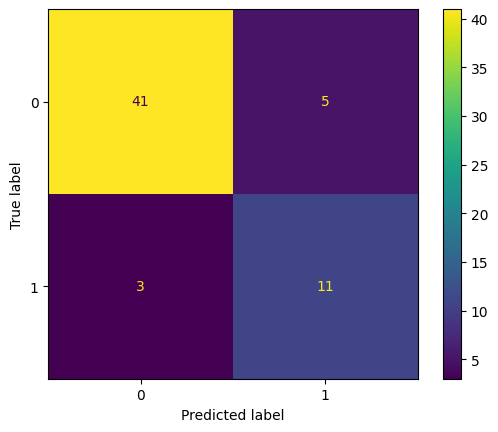

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

## mengimplementasikan sebuah Boosting Classifier menggunakan scikit-learn dengan algoritma AdaBoost

Boosting Classifier Success Rate : 86.67%


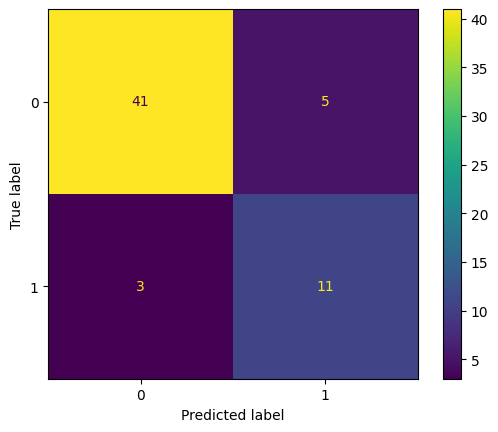

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Inisialisasi model boosting dengan algoritma AdaBoost
boostc = AdaBoostClassifier()

# Latih model menggunakan set pelatihan
boostc.fit(x_train, y_train)

p3=boostc.predict(x_test)
s3=accuracy_score(y_test,p3)
print("Boosting Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(boostc, x_test, y_test)

plt.show()

## Kesimpulan :
## Hasil clasifikasi menggunakan algoritma Random Forest dan algoritma AdaBoost mengahasilkan nilai akurasi yang sama dimana nilai akurasi dari kedua algoritma adalah 86.67%